# KNN


In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import KNN
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-24 02:27:32.727 | INFO     | assignment_2.digits_classifiers.io:read_datasets:46 - Reading datasets


In [3]:
X, y = data

## Removing constant columns

In [4]:
X.shape

(70000, 784)

In [5]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]
len(always_zero)

65

In [6]:
X.drop(columns=always_zero, axis=1, inplace=True)
X.shape

(70000, 719)

## Train Test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [8]:
X_train

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

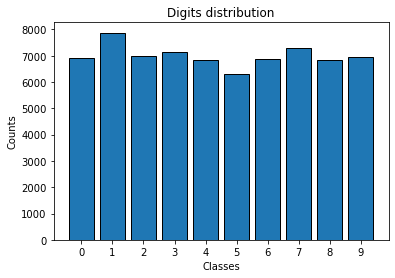

In [10]:
data.digit_distribution()

## Training KNN

In [11]:
knns = [
    KNN(train=train, test=test, params={"k": k})
    for k in [5, 11, 29]
]

Using small dimensionality for validation_train

In [12]:
_, X_train_cv, _, y_train_cv = train_test_split(X_train, y_train, test_size=0.20)
train_cv = Dataset(x=X_train_cv, y=y_train_cv)

In [13]:
X_train_cv

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
30897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
tuning_knns = ClassifierTuning(classifiers=knns, base_estimator=KNN.default_estimator(), data=train_cv, k=5)
tuning_knns

[Estimator: KNNEstimator(); K: 5; Params: {'k': [29, 11, 5]}]

In [15]:
%%time
tuning_knns.evaluate()

Wall time: 22min 16s


In [16]:
tuning_knns.best_params

{'k': 5}

In [17]:
tuning_knns.best_score

0.9475892857142856

In [18]:
best_knn = KNN(train=train, test=test, params=tuning_knns.best_params)
best_knn

[KNN: Train 56000, Test 14000, not fitted, not predicted] [k: 5]

In [19]:
%%time
best_knn.train()

Wall time: 469 ms


In [20]:
%%time
best_knn.predict()

 > 0.000000
 > 0.142857
 > 0.285714
 > 0.428571
 > 0.571429
 > 0.714286
 > 0.857143
 > 1.000000
 > 1.142857
 > 1.285714
 > 1.428571
 > 1.571429
 > 1.714286
 > 1.857143
 > 2.000000
 > 2.142857
 > 2.285714
 > 2.428571
 > 2.571429
 > 2.714286
 > 2.857143
 > 3.000000
 > 3.142857
 > 3.285714
 > 3.428571
 > 3.571429
 > 3.714286
 > 3.857143
 > 4.000000
 > 4.142857
 > 4.285714
 > 4.428571
 > 4.571429
 > 4.714286
 > 4.857143
 > 5.000000
 > 5.142857
 > 5.285714
 > 5.428571
 > 5.571429
 > 5.714286
 > 5.857143
 > 6.000000
 > 6.142857
 > 6.285714
 > 6.428571
 > 6.571429
 > 6.714286
 > 6.857143
 > 7.000000
 > 7.142857
 > 7.285714
 > 7.428571
 > 7.571429
 > 7.714286
 > 7.857143
 > 8.000000
 > 8.142857
 > 8.285714
 > 8.428571
 > 8.571429
 > 8.714286
 > 8.857143
 > 9.000000
 > 9.142857
 > 9.285714
 > 9.428571
 > 9.571429
 > 9.714286
 > 9.857143
 > 10.000000
 > 10.142857
 > 10.285714
 > 10.428571
 > 10.571429
 > 10.714286
 > 10.857143
 > 11.000000
 > 11.142857
 > 11.285714
 > 11.428571
 > 11.571429
 > 1

In [21]:
best_knn.accuracy

0.9713571428571428

2022-12-24 04:47:01.133 | INFO     | assignment_2.digits_classifiers.model:confusion_matrix:197 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\knn_cm.png


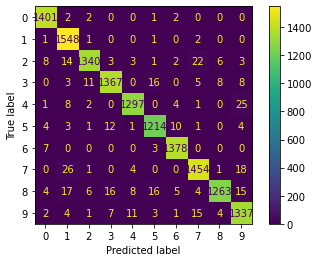

In [22]:
best_knn.confusion_matrix(save=True, file_name='knn_cm.png')

In [23]:
6.238310e-278

6.23831e-278

In [24]:
from math import floor, log10

def fexp(f):
    return int(floor(log10(abs(f)))) if f != 0 else 0

def fman(f):
    return f/10**fexp(f)

def n_repr(f):
    if f == 0:
        return 0
    return f"${round(fman(f), 2)} \\times 10^{{fexp(f)}}$"
n_repr(6.238310e-278)

'$6.24 \\times 10^{fexp(f)}$'

### Fool data

In [25]:
from assignment_2.digits_classifiers.io import read_fool_dataset

X_fool = read_fool_dataset()
X_fool.drop(columns=always_zero, axis=1, inplace=True)

In [26]:
best_knn.estimator.predict(X=X_fool)

 > 0.000000


array([9., 4., 9., 9., 5., 1.])